In [3]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library:
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions:
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('../datasets/songs.csv')
x = df[['year', 'length','commas','exclamations','colons','hyphens']]
y = df['artist']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [6]:
tree_clf = DecisionTreeClassifier(criterion='entropy')
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [9]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

f1_score?

Signature:
f1_score(
    y_true,
    y_pred,
    *,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute the F1 score, also known as balanced F-score or F-measure.

The F1 score can be interpreted as a harmonic mean of the precision and
recall, where an F1 score reaches its best value at 1 and worst score at 0.
The relative contribution of precision and recall to the F1 score are
equal. The formula for the F1 score is::

    F1 = 2 * TP / (2 * TP + FN + FP)

Where "TP" is the number of true positives, "FN" is the number of false
negatives, and "FP" is the number of false positives. F1 is by default
calculated as 0.0 when there are no true positives, false negatives, nor
false positives.

Support beyond term:`binary` targets is achieved by treating :term:`multiclass`
and :term:`multilabel` data as a collection of binary problems, one for each
label. For the :term:`binary` case, setting `average='binary'` will retu

In [11]:
y_pred = tree_clf.predict(x_test)
f1 = f1_score(y_test, y_pred, average='micro')
f1

0.7777777777777778

# Задание

- увеличить значение метрики f1_socre до 0.82 (в идеале до 0.85)
- меняем параметры модели (depth, criterion, ...)


In [12]:
depth = 1
f1 = 0
while f1 < 0.82:
    tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    tree_clf.fit(x_train, y_train)
    y_pred = tree_clf.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='micro')
    print(f"{f1} {depth}")
    depth+=1

0.5666666666666667 1
0.6555555555555556 2
0.6555555555555556 3
0.6777777777777778 4
0.6666666666666666 5
0.6777777777777778 6
0.7888888888888889 7
0.7666666666666667 8
0.8111111111111111 9
0.8222222222222222 10


In [14]:
from sklearn.model_selection import RandomizedSearchCV

In [18]:
tree_clf = DecisionTreeClassifier()
params = {
    'max_depth': range(1, 10),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_leaf': range(1, 30),
    'min_samples_split': range(1,40)
}

search = RandomizedSearchCV(tree_clf, params, scoring='f1_micro')
search.fit(x, y)
best_tree = search.best_estimator_
print(search.best_score_)
print(search.best_params_)

0.7333333333333334
{'min_samples_split': 18, 'min_samples_leaf': 5, 'max_depth': 9, 'criterion': 'entropy'}


In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
tree_clf = DecisionTreeClassifier()
params = {
    'max_depth': range(1, 10),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_leaf': range(1, 30),
    'min_samples_split': range(1,40)
}

search = GridSearchCV(tree_clf, params, scoring='f1_micro')
search.fit(x, y)
best_tree = search.best_estimator_
print(search.best_score_)
print(search.best_params_)

C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
3915 fits failed out of a total of 152685.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3915 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python310\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Python310\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Python310\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in val

0.7722222222222223
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}


C:\Python310\lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [       nan 0.61666667 0.61666667 ... 0.68055556 0.68055556 0.68055556]
  warnings.warn(


<Axes: >

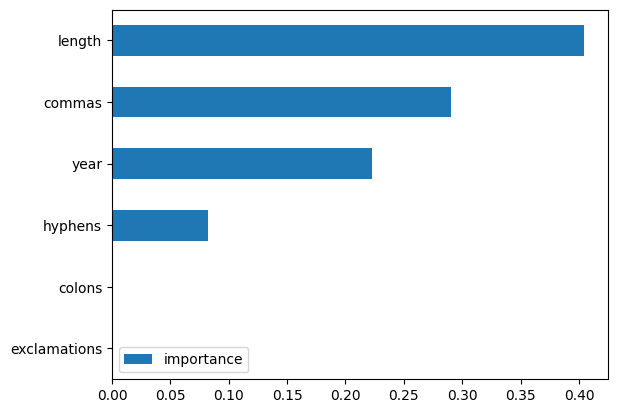

In [21]:
importances_df = pd.DataFrame(best_tree.feature_importances_, columns=['importance'], index=x.columns)
importances_df.sort_values(by='importance').plot(kind='barh')